In [2]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Use the telco_churn data. 

In [4]:
#read in telco data
df = pd.read_csv('telco_churn.csv')

In [5]:
#look at data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#lowercase columns cause uppercase gets makes an extra step
df.columns = df.columns.str.lower()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


### Does tenure correlate with monthly charges? 

$H_o$: there is no linear correlation between tenure and monthly charges

$H_a$: there is a linear correlation between tenure and monthly charges

In [10]:
#set alpha
alpha = 0.05

In [11]:
#look at tenure data
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [12]:
df.tenure

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [13]:
#look at monthlycharges data
df.monthlycharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: monthlycharges, Length: 1585, dtype: int64

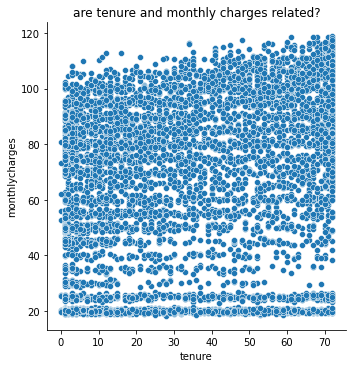

In [14]:
#plot relationship using relplot
sns.relplot(data=df, x='tenure', y='monthlycharges')

plt.title('are tenure and monthly charges related?')
plt.show()

In [16]:
#calculate r and p, using stats.pearsonr
r, p = stats.pearsonr(df.tenure, df.monthlycharges)
r, p

(0.2478998562861525, 4.094044991483017e-99)

In [17]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Total charges? 

In [18]:
#look at totalcharges data
df.totalcharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: totalcharges, Length: 6531, dtype: int64

In [19]:
df.totalcharges.value_counts().index

Index([' ', '20.2', '19.75', '20.05', '19.9', '19.65', '45.3', '19.55',
       '20.15', '20.25',
       ...
       '3306.85', '424.75', '6565.85', '2117.2', '203.95', '6849.4', '692.35',
       '130.15', '3211.9', '6844.5'],
      dtype='object', length=6531)

In [25]:
df = df [df.totalcharges != ' ']

In [28]:
df.totalcharges = df.totalcharges.astype(float)

/var/folders/14/ft4ch4ld42z46kvx0_wfd3d40000gp/T/ipykernel_6622/3164852085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.totalcharges = df.totalcharges.astype(float)


In [29]:
df.totalcharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7032, dtype: float64

In [30]:
df.totalcharges.value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: totalcharges, Length: 6530, dtype: int64

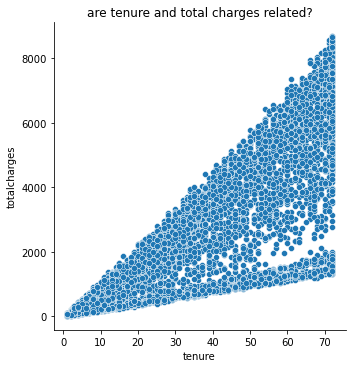

In [31]:
#plot relationship using relplot
sns.relplot(data=df, x=df.tenure, y=df.totalcharges)

plt.title('are tenure and total charges related?')
plt.show()

note: this is called heteroscedasticity (vs homoscedasticity)

In [33]:
#calculate r and p
r,p = stats.pearsonr(df.tenure, df.totalcharges)
r,p

(0.8258804609332093, 0.0)

In [34]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### What happens if you control for phone and internet service?

In [35]:
#look at phoneservice data
df.phoneservice.value_counts()

Yes    6352
No      680
Name: phoneservice, dtype: int64

In [36]:
#look at internetservice data
df.internetservice.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: internetservice, dtype: int64

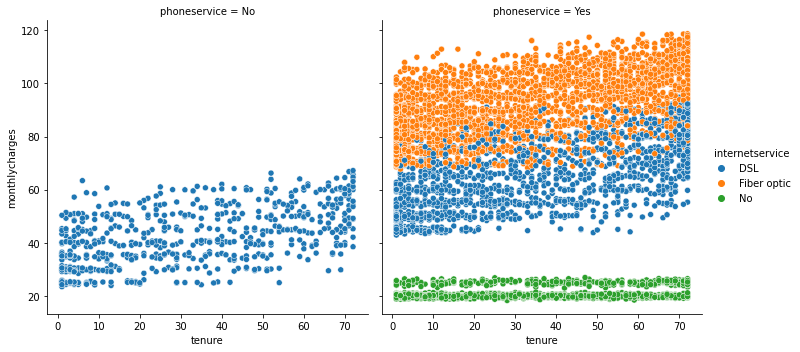

In [45]:
#plot relationships using relplot
#use hue and col to show additional variables
sns.relplot(data=df, x=df.tenure, y=df.monthlycharges, 
            col=df.phoneservice, hue=df.internetservice)

plt.show()

What relationships do we see from our visuals?

In [48]:
#use groupby to show internetserive and phoneservice grouping
df.groupby(['internetservice','phoneservice']).count()

customerid  gender  seniorcitizen  partner  \
internetservice phoneservice                                               
DSL             No                   680     680            680      680   
                Yes                 1736    1736           1736     1736   
Fiber optic     Yes                 3096    3096           3096     3096   
No              Yes                 1520    1520           1520     1520   

                              dependents  tenure  multiplelines  \
internetservice phoneservice                                      
DSL             No                   680     680            680   
                Yes                 1736    1736           1736   
Fiber optic     Yes                 3096    3096           3096   
No              Yes                 1520    1520           1520   

                              onlinesecurity  onlinebackup  deviceprotection  \
internetservice phoneservice                                                   
DSL             No                       680           680               680   
                Yes                     1736          1736              1736   
Fiber optic     Yes                     3096          3096              3096   
No              Yes                     1520          1520              1520   

                              techsupport  streamingtv  streamingmovies  \
internetservice phoneservice                                              
DSL             No                    680          680              680   
                Yes                  1736         1736             1736   
Fiber optic     Yes                  3096         3096             3096   
No              Yes                  1520         1520             1520   

                              contract  paperlessbilling  paymentmethod  \
internetservice phoneservice                                              
DSL             No                 680               680            680   
                Yes               1736              1736           1736   
Fiber optic     Yes               3096              3096           3096   
No              Yes               1520              1520           1520   

                              monthlycharges  totalcharges  churn  
internetservice phoneservice                                       
DSL             No                       680           680    680  
                Yes                     1736          1736   1736  
Fiber optic     Yes                     3096          3096   3096  
No              Yes                     1520          1520   1520

In [54]:
#define correlation function 
def corr_fun(df):
    return pd.Series(stats.pearsonr(df.tenure, df.totalcharges),
                    index=['r','p'])

In [58]:
#use apply to apply correlation function
df.groupby(['internetservice','phoneservice']).apply(corr_fun)

r    p
internetservice phoneservice               
DSL             No            0.953423  0.0
                Yes           0.970533  0.0
Fiber optic     Yes           0.985309  0.0
No              Yes           0.981465  0.0

We can reject the null for all of the controlled cases.

### Use the employees database.

In [59]:
import env

In [61]:
#get url to connect to sql via python
url = env.get_db_url('employees')

### Is there a relationship between how long an employee has been with the company and their salary?

In [62]:
#set sql query
query = '''
        select * 
        from employees
            join salaries
                using (emp_no)
        where to_date = '9999-01-01'
        '''

In [64]:
#read in sql query
df = pd.read_sql(query, url)

In [65]:
#look at your data!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


In [69]:
#look at to_date data
df.to_date.value_counts()

9999-01-01    240124
Name: to_date, dtype: int64

In [67]:
#look at from_date data
df.from_date.value_counts()

2002-04-03    793
2001-08-26    748
2001-10-28    739
2002-04-04    731
2002-07-11    725
             ... 
2002-02-18    604
2002-07-21    604
2001-10-29    599
2002-03-15    597
2002-03-12    589
Name: from_date, Length: 364, dtype: int64

In [68]:
#look at hire date
df.hire_date.value_counts()

1985-06-06    114
1985-12-12    110
1985-05-11    109
1985-06-20    109
1985-03-21    106
             ... 
1999-12-18      1
2000-01-04      1
1999-07-03      1
1999-09-26      1
2000-01-22      1
Name: hire_date, Length: 5425, dtype: int64

In [70]:
#subtract dates to get tenure
(df.to_date - df.hire_date)

0         2926512 days, 0:00:00
1         2926729 days, 0:00:00
2         2926449 days, 0:00:00
3         2926354 days, 0:00:00
4         2925338 days, 0:00:00
                  ...          
240119    2924120 days, 0:00:00
240120    2924958 days, 0:00:00
240121    2926578 days, 0:00:00
240122    2923846 days, 0:00:00
240123    2922337 days, 0:00:00
Length: 240124, dtype: object

In [76]:
#reformat tenure to int so it's useable
df['tenure'] = (df.to_date - df.hire_date).astype(str).str.split(' ', expand=True)[0]

In [81]:
df.tenure = df.tenure.astype(int)

In [82]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,2926512
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,2926729
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,2926449
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,2926354
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,2925338


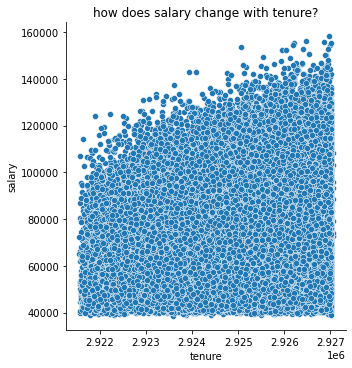

In [83]:
#plot relationships
sns.relplot(data=df, x=df.tenure, y=df.salary)

plt.title('how does salary change with tenure?')
plt.show()

In [84]:
#calculate r and p
r, p = stats.pearsonr(df.tenure, df.salary)
r, p

(0.30646256131860095, 0.0)

In [85]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


>there is a pretty weak correlation, even though we rejected the null hypothesis

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [86]:
#set sql query
query = ''' 
    select emp_no
    , datediff(max(to_date), min(from_date)) as tenure
    , count(title) as num_titles
    from titles
    group by emp_no
    having max(to_date) = '9999-01-01'
    ;
    '''

In [87]:
#read in sql query
df = pd.read_sql(query, url)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   emp_no      240124 non-null  int64
 1   tenure      240124 non-null  int64
 2   num_titles  240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


In [89]:
df.head()

,emp_no,tenure,num_titles
0,10001,2926512,1
1,10002,2922821,1
2,10003,2923065,1
3,10004,2926354,2
4,10005,2925338,2


In [90]:
#look at tenure data
df.tenure.value_counts()

2924866    71
2921885    67
2925431    67
2921884    66
2925911    66
           ..
2922781    21
2922719    19
2927053     9
2927022     8
2927040     1
Name: tenure, Length: 5481, dtype: int64

In [91]:
#look at num_titles
df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

In [95]:
df.shape

(240124, 3)

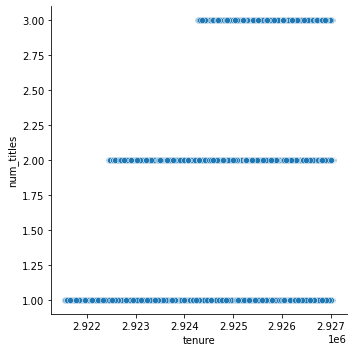

In [92]:
#plot the relationship! 
sns.relplot(data=df, x=df.tenure, y=df.num_titles)
plt.show()

In [93]:
#calculate r and p
r, p = stats.pearsonr(df.tenure, df.num_titles)
r, p

(0.5311014974074301, 0.0)

In [94]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Use the sleepstudy data. Is there a relationship between days and reaction time?

In [96]:
from pydataset import data

In [106]:
#read in data from pydataset & look at it! 
df = data('sleepstudy')
df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [108]:
#look at days data
df.Days.value_counts()

0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: Days, dtype: int64

In [109]:
#look at reaction time data
df.Reaction.value_counts()

249.5600    1
255.5271    1
329.7247    1
379.4445    1
362.9184    1
           ..
289.5550    1
276.7693    1
299.8097    1
297.1710    1
364.1236    1
Name: Reaction, Length: 180, dtype: int64

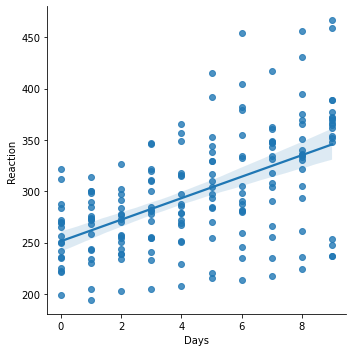

In [111]:
#check out lmplot to plot! 
sns.lmplot(data=df, x='Days', y='Reaction')
plt.show()

In [112]:
#calculate r and p
r, p = stats.pearsonr(df.Days, df.Reaction)
r, p

(0.5352302262650255, 9.89409632221439e-15)

In [113]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis
